In [1]:
import numpy as np
from shapely.geometry import Polygon

import matplotlib.pyplot as plt
%matplotlib inline

import sys, os
sys.path.append(os.path.join(os.environ['REPO_DIR'], 'utilities'))
from utilities2015 import *
from annotation_utilities import *
from metadata import *

Setting environment for Local Macbook Pro


In [2]:
label_polygons = load_label_polygons_if_exists(stack='MD594', username='yuncong', orientation='sagittal', downsample=32, output=False, 
                                               force=True, annotation_rootdir=annotation_midbrainIncluded_v2_rootdir)

Loaded annotation /home/yuncong/CSHL_labelings_v2/MD594/MD594_sagittal_downsample32_yuncong_08182016082453.pkl.
Label Cb on Section 93 is not recognized.
Label Cb on Section 105 is not recognized.
Label Cb on Section 115 is not recognized.
Label Cb on Section 125 is not recognized.
Label Cb on Section 136 is not recognized.
Label Cb on Section 140 is not recognized.
Label Cb on Section 146 is not recognized.
Label Cb on Section 156 is not recognized.
Label Cb on Section 166 is not recognized.
Label Cb on Section 176 is not recognized.
Label Cb on Section 186 is not recognized.
Label Cb on Section 196 is not recognized.
Label Cb on Section 206 is not recognized.
Label Cb on Section 216 is not recognized.
Label Cb on Section 226 is not recognized.
Label Cb on Section 230 is not recognized.
Label Cb on Section 235 is not recognized.
Label Cb on Section 236 is not recognized.
Label Cb on Section 237 is not recognized.
Label Cb on Section 239 is not recognized.
Label Cb on Section 240 is no

In [39]:
# cnt1 = label_polygons['Cb'][266]
# cnt2 = label_polygons['Cb'][276]

In [62]:
cnt1 = [(1117.28949984232, 1931.6519169809123), (1118.2730293316179, 1868.7060296658522), (1162.5318563500196, 1833.2989680511307), (1191.0542115396563, 1793.9577884792182), (1234.3295090687602, 1724.127194739073), (1262.851864258397, 1636.5930701915674), (1288.4236309801402, 1504.80011862566), (1368.0895196132633, 1496.9318827112772), (1424.1507005032388, 1579.548359812294), (1412.348346631665, 1711.3413113782015), (1366.1224606346677, 1830.3483795832374), (1302.1930438303095, 1926.7342695344234), (1269.7365706834817, 2008.3672171461421), (1223.5106846864842, 2037.8731018250767), (1188.1036230717627, 2032.9554543785875), (1148.7624434998502, 1988.6966273601859)]
cnt2 = [(1114.3389113744265, 2030.0048659106942), (1087.7836151633855, 1954.2730952347622), (1132.0424421817872, 1915.9154451521474), (1203.840094900528, 1826.414261626046), (1230.3953911115689, 1734.946019121349), (1246.131862940334, 1677.9013087420756), (1259.9012757905034, 1568.729535430018), (1281.5389245550555, 1491.0307057754903), (1343.5012823808179, 1505.7836481149577), (1369.073049102561, 1580.5318893015917), (1348.418929827307, 1715.2754293353928), (1317.9295156590747, 1911.981327194956), (1286.4565720015446, 2010.3342761247377), (1266.785982215588, 2101.802518629435), (1209.7412718363148, 2130.3248738190714), (1179.2518576680825, 2138.193109733454), (1155.6471499249349, 2092.9507532257544)]

In [63]:
# cnt2 += np.random.random((len(cnt2), 2)) * 30

In [64]:
def resample_polygon(cnt, n_points=None, len_interval=20):

    polygon = Polygon(cnt)

    if n_points is None:
        contour_length = polygon.exterior.length
        n_points = max(3, int(contour_length / len_interval))

    resampled_cnt = np.empty((n_points, 2))
    for i, p in enumerate(np.linspace(0, 1, n_points+1)[:-1]):
        pt = polygon.exterior.interpolate(p, normalized=True)
        resampled_cnt[i] = (pt.x, pt.y)
    return resampled_cnt


In [65]:
nlevels = 10

In [66]:
def signed_curvatures(s, d=7):
    xp = np.gradient(s[:, 0], d)
    xpp = np.gradient(xp, d)
    yp = np.gradient(s[:, 1], d)
    ypp = np.gradient(yp, d)
    curvatures = (xp * ypp - yp * xpp)/np.sqrt(xp**2+yp**2)**3
    return curvatures, xp, yp

In [67]:
l1 = Polygon(cnt1).length
l2 = Polygon(cnt2).length
n1 = len(cnt1)
n2 = len(cnt2)
len_interval_1 = l1 / n1
len_interval_2 = l2 / n2
len_interval_interpolated = np.linspace(len_interval_1, len_interval_2, nlevels)

len_interval_0 = 20
n_points = max(int(np.round(max(l1, l2) / len_interval_0)), n1, n2)

s1 = resample_polygon(cnt1, n_points=n_points)
s2 = resample_polygon(cnt2, n_points=n_points)

# Make sure point sets are both clockwise or both anti-clockwise.

# c1 = np.mean(s1, axis=0)
# c2 = np.mean(s2, axis=0)
# d1 = (s1 - c1)[0]
# d1 = d1 / np.linalg.norm(d1)
# d2s = s2 - c2
# d2s = d2s / np.sqrt(np.sum(d2s**2, axis=1))[:,None]
# s2_start_index = np.argmax(np.dot(d1, d2s.T))
# print s2_start_index
# s2 = np.r_[np.atleast_2d(s2[s2_start_index:]), np.atleast_2d(s2[:s2_start_index])]

# s2i = np.r_[[s2[0]], s2[1:][::-1]]

s2i = s2[::-1]

# curv1, xp1, yp1 = signed_curvatures(s1)
# curv2, xp2, yp2 = signed_curvatures(s2)
# curv2i, xp2i, yp2i = signed_curvatures(s2i)

d = 7
xp1 = np.gradient(s1[:, 0], d)
yp1 = np.gradient(s1[:, 1], d)
xp2 = np.gradient(s2[:, 0], d)
yp2 = np.gradient(s2[:, 1], d)
xp2i = np.gradient(s2i[:, 0], d)
yp2i = np.gradient(s2i[:, 1], d)


# using correlation over curvature values directly is much better than using correlation over signs
# sign1 = np.sign(curv1)
# sign2 = np.sign(curv2)
# sign2i = np.sign(curv2i)

# conv_curv_1_2 = np.correlate(np.r_[curv2, curv2], curv1, mode='valid')
conv_xp_1_2 = np.correlate(np.r_[xp2, xp2], xp1, mode='valid')
conv_yp_1_2 = np.correlate(np.r_[yp2, yp2], yp1, mode='valid')

# conv_1_2 = np.correlate(np.r_[sign2, sign2], sign1, mode='valid')

# top, second = conv_1_2.argsort()[::-1][:2]
# d2_top = (s2 - c2)[top]
# d2_top = d2_top / np.linalg.norm(d2_top)
# d2_second = (s2 - c2)[second]
# d2_second = d2_second / np.linalg.norm(d2_second)
# s2_start_index = [top, second][np.argmax(np.dot([d2_top, d2_second], d1))]

# conv_curv_1_2i = np.correlate(np.r_[curv2i, curv2i], curv1, mode='valid')
conv_xp_1_2i = np.correlate(np.r_[xp2i, xp2i], xp1, mode='valid')
conv_yp_1_2i = np.correlate(np.r_[yp2i, yp2i], yp1, mode='valid')

# conv_1_2i = np.correlate(np.r_[sign2i, sign2i], sign1, mode='valid')
# top, second = conv_1_2i.argsort()[::-1][:2]
# if xp1[top] * xp2i[top] + yp1[top] * yp2i[top] > xp1[top] * xp2i[top] + yp1[top] * yp2i[top] :
#     s2i_start_index = top
# else:
#     s2i_start_index = second

# d2_top = (s2i - c2)[top]
# d2_top = d2_top / np.linalg.norm(d2_top)
# d2_second = (s2i - c2)[second]
# d2_second = d2_second / np.linalg.norm(d2_second)
# s2i_start_index = [top, second][np.argmax(np.dot([d2_top, d2_second], d1))]

# if conv_1_2[s2_start_index] > conv_1_2i[s2i_start_index]:
#     s3 = np.r_[np.atleast_2d(s2[s2_start_index:]), np.atleast_2d(s2[:s2_start_index])]
# else:
#     s3 = np.r_[np.atleast_2d(s2i[s2i_start_index:]), np.atleast_2d(s2i[:s2i_start_index])]

# from scipy.spatial import KDTree
# tree = KDTree(s1)
# nn_in_order_s2 = np.count_nonzero(np.diff(tree.query(s2)[1]) > 0)
# nn_in_order_s2i = np.count_nonzero(np.diff(tree.query(s2i)[1]) > 0)

# overall_s2 = conv_curv_1_2 / conv_curv_1_2.max() + conv_xp_1_2 / conv_xp_1_2.max() + conv_yp_1_2 / conv_yp_1_2.max()
# overall_s2i = conv_curv_1_2i / conv_curv_1_2i.max() + conv_xp_1_2i / conv_xp_1_2i.max() + conv_yp_1_2i / conv_yp_1_2i.max()

# overall_s2 =  conv_xp_1_2 / conv_xp_1_2.max() + conv_yp_1_2 / conv_yp_1_2.max()
# overall_s2i =  conv_xp_1_2i / conv_xp_1_2i.max() + conv_yp_1_2i / conv_yp_1_2i.max()

overall_s2 =  conv_xp_1_2 + conv_yp_1_2
overall_s2i =  conv_xp_1_2i + conv_yp_1_2i

if overall_s2.max() > overall_s2i.max():
    s2_start_index = np.argmax(overall_s2)
    s3 = np.roll(s2, -s2_start_index, axis=0)
else:
    s2i_start_index = np.argmax(overall_s2i)
    s3 = np.roll(s2i, -s2i_start_index, axis=0)

# plt.plot(overall)
# plt.show();
    
interpolated_contours = [(1-r) * s1 + r * s3 for r in np.linspace(0, 1, nlevels)]
resampled_interpolated_contours = [resample_polygon(cnt, len_interval=len_interval_interpolated[i]) for i, cnt in enumerate(interpolated_contours)]

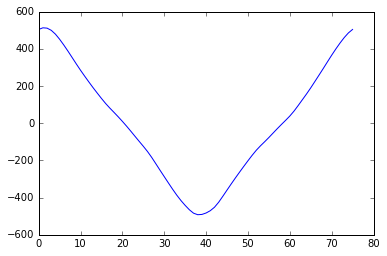

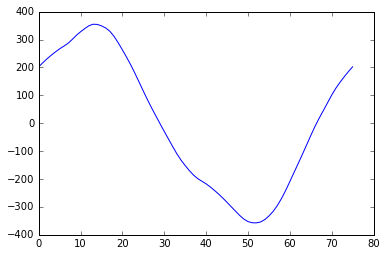

In [68]:
plt.plot(overall_s2)
plt.show()

plt.plot(overall_s2i)
plt.show()

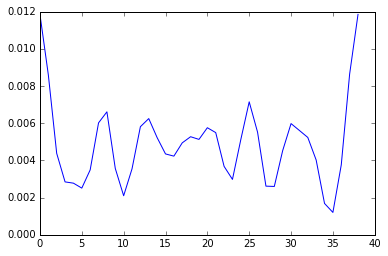

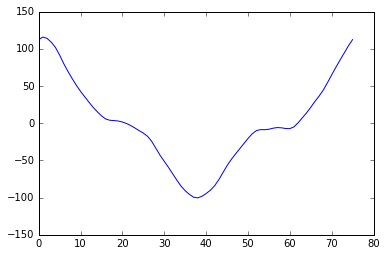

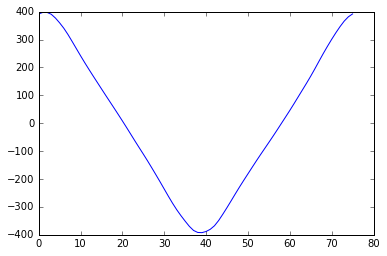

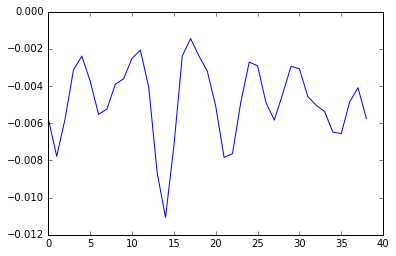

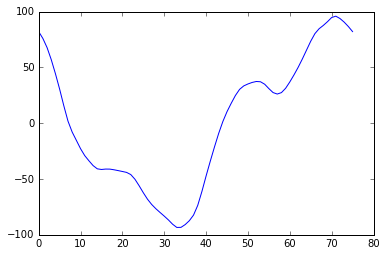

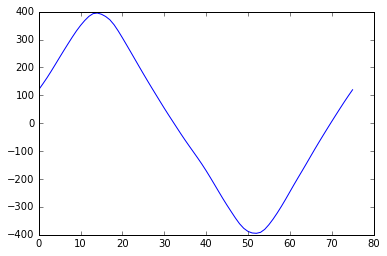

In [69]:
conv_curv_1_2 = np.correlate(np.r_[curv2, curv2], curv1, mode='valid')
plt.plot(conv_curv_1_2)
plt.show()

conv_xp_1_2 = np.correlate(np.r_[xp2, xp2], xp1, mode='valid')
plt.plot(conv_xp_1_2)
plt.show()

conv_yp_1_2 = np.correlate(np.r_[yp2, yp2], yp1, mode='valid')
plt.plot(conv_yp_1_2)
plt.show()

# conv_1_2 = np.correlate(np.r_[sign2, sign2], sign1, mode='valid')
# plt.plot(conv_1_2)
# plt.show()

conv_curv_1_2i = np.correlate(np.r_[curv2i, curv2i], curv1, mode='valid')
plt.plot(conv_curv_1_2i)
plt.show()

conv_xp_1_2i = np.correlate(np.r_[xp2i, xp2i], xp1, mode='valid')
plt.plot(conv_xp_1_2i)
plt.show()

conv_yp_1_2i = np.correlate(np.r_[yp2i, yp2i], yp1, mode='valid')
plt.plot(conv_yp_1_2i)
plt.show()

# conv_1_2 = np.correlate(np.r_[sign2i, sign2i], sign1, mode='valid')
# plt.plot(conv_1_2)
# plt.show()


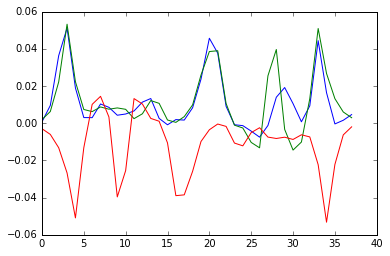

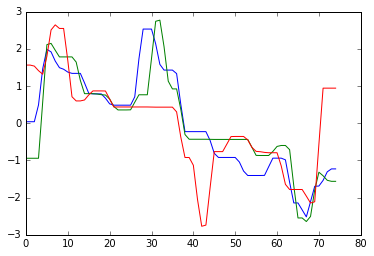

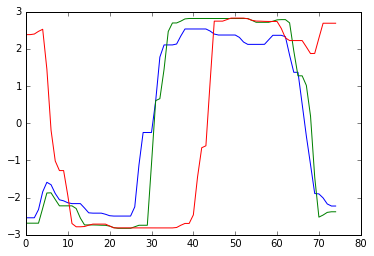

In [70]:
plt.plot(curv1);
plt.plot(curv2);
plt.plot(curv2i);
plt.show()

plt.plot(xp1);
plt.plot(xp2);
plt.plot(xp2i);
plt.show();

plt.plot(yp1);
plt.plot(yp2);
plt.plot(yp2i);
plt.show();

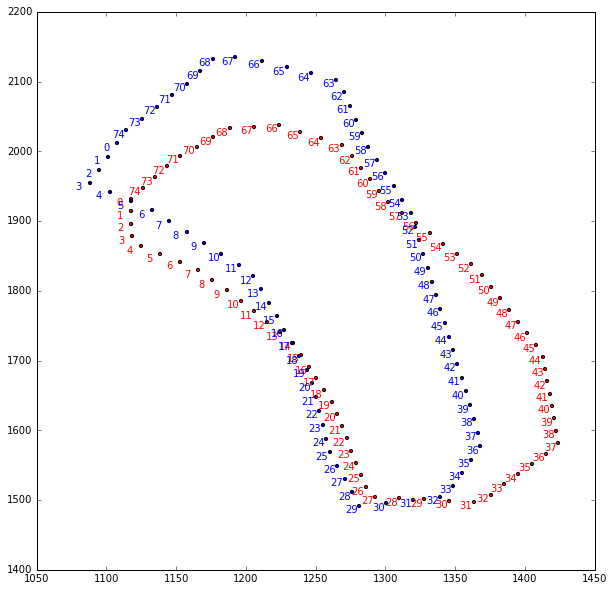

In [71]:
plt.figure(figsize=(10,10));

plt.scatter(s1[:,0], s1[:,1], s=10, c='r')
# plt.scatter(s2i[:,0], s2[:,1], s=10, c='g')
# plt.scatter(s2i[:,0], s2i[:,1], s=10, c='g')
plt.scatter(s3[:,0], s3[:,1], s=10, c='b')

for i, (x, y) in enumerate(s1):
    plt.text(x-10, y-10, str(i), size=10, color='r')

# for i, (x, y) in enumerate(s2):
#     plt.text(x-10, y-10, str(i), size=10, color='g')

# for i, (x, y) in enumerate(s2i):
#     plt.text(x-10, y-10, str(i), size=10, color='g')

for i, (x, y) in enumerate(s3):
    plt.text(x-10, y-10, str(i), size=10, color='b')
    
plt.show()